In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
predictor=pd.read_csv("/content/drive/MyDrive/delhi traffic prediction/delhi_traffic_features.csv")
target=pd.read_csv("/content/drive/MyDrive/delhi traffic prediction/delhi_traffic_target.csv")


In [5]:
df = pd.merge(predictor, target, on="Trip_ID")
df.head()

,Trip_ID,start_area,end_area,distance_km,time_of_day,day_of_week,weather_condition,traffic_density_level,road_type,average_speed_kmph,travel_time_minutes
0,TRIP_00001,Vasant Kunj,Kalkaji,9.44,Night,Weekday,Clear,Low,Main Road,37.8,15.3
1,TRIP_00002,Greater Kailash,Kalkaji,2.15,Night,Weekend,Clear,Low,Main Road,42.7,3.0
2,TRIP_00003,Janakpuri,Model Town,14.54,Morning Peak,Weekday,Rain,High,Inner Road,9.7,92.7
3,TRIP_00004,Punjabi Bagh,Dwarka,11.86,Night,Weekday,Clear,Low,Highway,68.5,10.6
4,TRIP_00005,Rohini,Chandni Chowk,20.26,Afternoon,Weekday,Fog,Medium,Highway,30.3,42.0


In [5]:
df.shape

(4000, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_ID                4000 non-null   object 
 1   start_area             4000 non-null   object 
 2   end_area               4000 non-null   object 
 3   distance_km            4000 non-null   float64
 4   time_of_day            4000 non-null   object 
 5   day_of_week            4000 non-null   object 
 6   weather_condition      4000 non-null   object 
 7   traffic_density_level  4000 non-null   object 
 8   road_type              4000 non-null   object 
 9   average_speed_kmph     4000 non-null   float64
 10  travel_time_minutes    4000 non-null   float64
dtypes: float64(3), object(8)
memory usage: 343.9+ KB


In [7]:
df.describe()


,distance_km,average_speed_kmph,travel_time_minutes
count,4000.000000,4000.000000,4000.000000
mean,13.342965,28.085300,40.155925
std,6.367559,17.057224,31.883265
min,1.510000,4.800000,2.100000
25%,8.660000,14.500000,18.400000
50%,13.170000,24.200000,30.300000
75%,17.230000,38.200000,52.100000
max,33.010000,93.300000,283.600000


In [8]:
df.isnull().sum()

,0
Trip_ID,0
start_area,0
end_area,0
distance_km,0
time_of_day,0
day_of_week,0
weather_condition,0
traffic_density_level,0
road_type,0
average_speed_kmph,0


In [9]:
df[df.duplicated()]

,Trip_ID,start_area,end_area,distance_km,time_of_day,day_of_week,weather_condition,traffic_density_level,road_type,average_speed_kmph,travel_time_minutes


# **Remove Impossible Values**

In [10]:
df = df[df['distance_km'] > 0]

In [11]:
df = df[(df['average_speed_kmph'] > 0) & (df['average_speed_kmph'] < 150)]

In [12]:
df = df[df['travel_time_minutes'] > 0]

In [13]:
df.shape

(4000, 11)

# **Outlier Detection**

<Axes: xlabel='distance_km'>

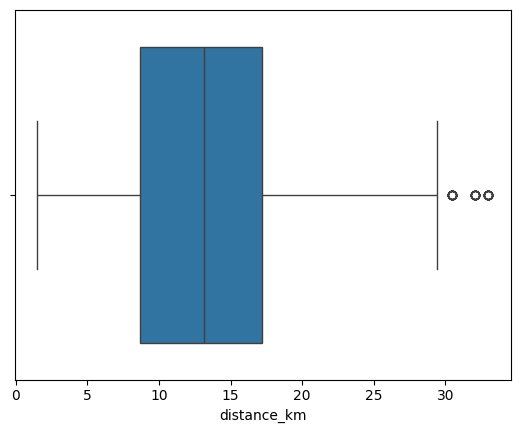

In [16]:
import seaborn as sns
sns.boxplot(x=df['distance_km'])


<Axes: xlabel='average_speed_kmph'>

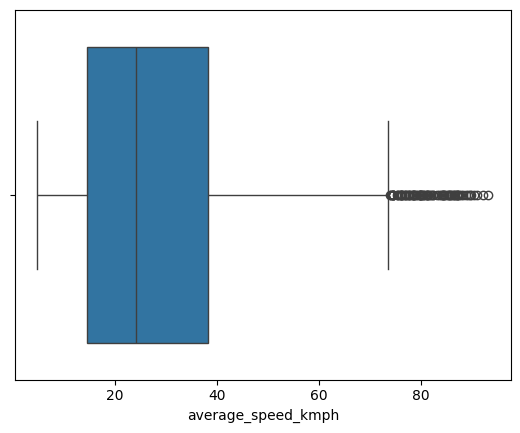

In [17]:
sns.boxplot(x=df['average_speed_kmph'])

In [19]:
df[df['average_speed_kmph'] >= 90]

,Trip_ID,start_area,end_area,distance_km,time_of_day,day_of_week,weather_condition,traffic_density_level,road_type,average_speed_kmph,travel_time_minutes
688,TRIP_00689,Okhla,Vasant Kunj,11.21,Night,Weekend,Clear,Low,Highway,91.0,8.9
1593,TRIP_01594,Karol Bagh,Rohini,16.99,Night,Weekday,Clear,Low,Highway,92.2,11.3
2440,TRIP_02441,Nehru Place,Shahdara,14.22,Night,Weekend,Clear,Low,Highway,90.4,9.2
2796,TRIP_02797,Rohini,Vasant Kunj,27.39,Night,Weekend,Clear,Low,Highway,93.3,17.5


In [20]:
df[df['distance_km'] <= 50]

,Trip_ID,start_area,end_area,distance_km,time_of_day,day_of_week,weather_condition,traffic_density_level,road_type,average_speed_kmph,travel_time_minutes
0,TRIP_00001,Vasant Kunj,Kalkaji,9.44,Night,Weekday,Clear,Low,Main Road,37.8,15.3
1,TRIP_00002,Greater Kailash,Kalkaji,2.15,Night,Weekend,Clear,Low,Main Road,42.7,3.0
2,TRIP_00003,Janakpuri,Model Town,14.54,Morning Peak,Weekday,Rain,High,Inner Road,9.7,92.7
3,TRIP_00004,Punjabi Bagh,Dwarka,11.86,Night,Weekday,Clear,Low,Highway,68.5,10.6
4,TRIP_00005,Rohini,Chandni Chowk,20.26,Afternoon,Weekday,Fog,Medium,Highway,30.3,42.0
...,...,...,...,...,...,...,...,...,...,...,...
3995,TRIP_03996,Rajouri Garden,Dwarka,9.64,Morning Peak,Weekday,Clear,Very High,Inner Road,7.7,76.8
3996,TRIP_03997,Rohini,Dwarka,17.53,Morning Peak,Weekend,Clear,High,Main Road,28.7,37.2
3997,TRIP_03998,Preet Vihar,Lajpat Nagar,9.58,Morning Peak,Weekend,Clear,High,Main Road,19.0,30.9
3998,TRIP_03999,Karol Bagh,Hauz Khas,11.44,Evening Peak,Weekend,Heatwave,High,Main Road,25.2,27.6


In [21]:
df[df['travel_time_minutes'] <= 300]

,Trip_ID,start_area,end_area,distance_km,time_of_day,day_of_week,weather_condition,traffic_density_level,road_type,average_speed_kmph,travel_time_minutes
0,TRIP_00001,Vasant Kunj,Kalkaji,9.44,Night,Weekday,Clear,Low,Main Road,37.8,15.3
1,TRIP_00002,Greater Kailash,Kalkaji,2.15,Night,Weekend,Clear,Low,Main Road,42.7,3.0
2,TRIP_00003,Janakpuri,Model Town,14.54,Morning Peak,Weekday,Rain,High,Inner Road,9.7,92.7
3,TRIP_00004,Punjabi Bagh,Dwarka,11.86,Night,Weekday,Clear,Low,Highway,68.5,10.6
4,TRIP_00005,Rohini,Chandni Chowk,20.26,Afternoon,Weekday,Fog,Medium,Highway,30.3,42.0
...,...,...,...,...,...,...,...,...,...,...,...
3995,TRIP_03996,Rajouri Garden,Dwarka,9.64,Morning Peak,Weekday,Clear,Very High,Inner Road,7.7,76.8
3996,TRIP_03997,Rohini,Dwarka,17.53,Morning Peak,Weekend,Clear,High,Main Road,28.7,37.2
3997,TRIP_03998,Preet Vihar,Lajpat Nagar,9.58,Morning Peak,Weekend,Clear,High,Main Road,19.0,30.9
3998,TRIP_03999,Karol Bagh,Hauz Khas,11.44,Evening Peak,Weekend,Heatwave,High,Main Road,25.2,27.6


<Axes: xlabel='travel_time_minutes'>

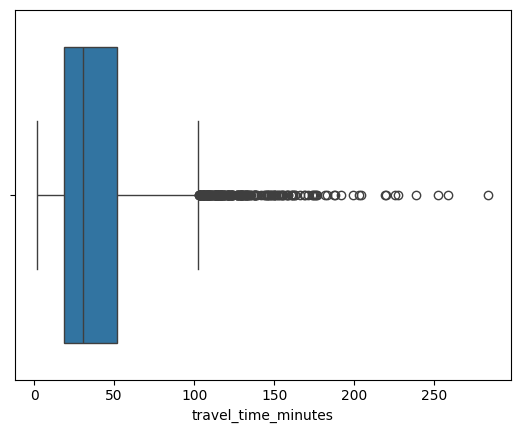

In [22]:
sns.boxplot(x=df['travel_time_minutes'])

In [23]:
df['travel_time_minutes'].describe()

,travel_time_minutes
count,4000.000000
mean,40.155925
std,31.883265
min,2.100000
25%,18.400000
50%,30.300000
75%,52.100000
max,283.600000


In [24]:
df[df['travel_time_minutes'] > 180]

,Trip_ID,start_area,end_area,distance_km,time_of_day,day_of_week,weather_condition,traffic_density_level,road_type,average_speed_kmph,travel_time_minutes
112,TRIP_00113,IGI Airport,Preet Vihar,21.04,Evening Peak,Weekday,Fog,High,Inner Road,8.1,187.9
620,TRIP_00621,Pitampura,Nehru Place,20.88,Morning Peak,Weekend,Fog,Very High,Main Road,6.8,191.7
650,TRIP_00651,Noida Sector 18,Rohini,33.01,Evening Peak,Weekday,Clear,Very High,Inner Road,8.2,238.6
1019,TRIP_01020,IGI Airport,Model Town,19.83,Morning Peak,Weekday,Fog,Very High,Main Road,5.3,227.4
1253,TRIP_01254,Janakpuri,Shahdara,20.44,Evening Peak,Weekday,Rain,Very High,Main Road,6.9,187.0
1521,TRIP_01522,Preet Vihar,IGI Airport,21.04,Evening Peak,Weekend,Fog,Very High,Main Road,5.6,219.0
1590,TRIP_01591,Okhla,Dwarka,23.01,Evening Peak,Weekday,Fog,Very High,Main Road,7.7,181.6
1774,TRIP_01775,Nehru Place,Model Town,19.38,Evening Peak,Weekday,Fog,Very High,Main Road,5.2,219.7
1901,TRIP_01902,Rohini,Shahdara,24.21,Evening Peak,Weekday,Fog,Very High,Main Road,5.2,283.6
2497,TRIP_02498,Shahdara,Rohini,24.21,Evening Peak,Weekday,Rain,Very High,Main Road,7.0,203.0


# **Feature Engineering**

In [25]:
df['expected_time'] = (df['distance_km'] / df['average_speed_kmph']) * 60

In [26]:
df['is_peak'] = df['time_of_day'].isin(['Morning Peak', 'Evening Peak']).astype(int)

In [27]:
df['is_weekend'] = (df['day_of_week'] == 'Weekend').astype(int)

In [28]:
df

,Trip_ID,start_area,end_area,distance_km,time_of_day,day_of_week,weather_condition,traffic_density_level,road_type,average_speed_kmph,travel_time_minutes,expected_time,is_peak,is_weekend
0,TRIP_00001,Vasant Kunj,Kalkaji,9.44,Night,Weekday,Clear,Low,Main Road,37.8,15.3,14.984127,0,0
1,TRIP_00002,Greater Kailash,Kalkaji,2.15,Night,Weekend,Clear,Low,Main Road,42.7,3.0,3.021077,0,1
2,TRIP_00003,Janakpuri,Model Town,14.54,Morning Peak,Weekday,Rain,High,Inner Road,9.7,92.7,89.938144,1,0
3,TRIP_00004,Punjabi Bagh,Dwarka,11.86,Night,Weekday,Clear,Low,Highway,68.5,10.6,10.388321,0,0
4,TRIP_00005,Rohini,Chandni Chowk,20.26,Afternoon,Weekday,Fog,Medium,Highway,30.3,42.0,40.118812,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,TRIP_03996,Rajouri Garden,Dwarka,9.64,Morning Peak,Weekday,Clear,Very High,Inner Road,7.7,76.8,75.116883,1,0
3996,TRIP_03997,Rohini,Dwarka,17.53,Morning Peak,Weekend,Clear,High,Main Road,28.7,37.2,36.648084,1,1
3997,TRIP_03998,Preet Vihar,Lajpat Nagar,9.58,Morning Peak,Weekend,Clear,High,Main Road,19.0,30.9,30.252632,1,1
3998,TRIP_03999,Karol Bagh,Hauz Khas,11.44,Evening Peak,Weekend,Heatwave,High,Main Road,25.2,27.6,27.238095,1,1


In [29]:
time_map = {
    'Night': 0,
    'Morning': 1,
    'Morning Peak': 2,
    'Afternoon': 3,
    'Evening': 4,
    'Evening Peak': 5
}

df['time_of_day_num'] = df['time_of_day'].map(time_map)

In [30]:
density_map = {
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Very High': 4
}

df['traffic_density_level'] = df['traffic_density_level'].map(density_map)

In [31]:
weather_map = {
    'Clear': 0,
    'Fog': 1,
    'Rain': 2,
    'Heatwave': 1
}

df['weather_risk'] = df['weather_condition'].map(weather_map)

In [32]:
road_map = {
    'Inner Road': 1,
    'Main Road': 2,
    'Highway': 3
}

df['road_type_num'] = df['road_type'].map(road_map)

In [36]:
(df['start_area'] + '_' + df['end_area']).nunique()

600

In [37]:
df.drop(columns=['weather_condition', 'road_type'], inplace=True)

In [38]:
df

,Trip_ID,start_area,end_area,distance_km,time_of_day,day_of_week,traffic_density_level,average_speed_kmph,travel_time_minutes,expected_time,is_peak,is_weekend,time_of_day_num,weather_risk,road_type_num
0,TRIP_00001,Vasant Kunj,Kalkaji,9.44,Night,Weekday,1,37.8,15.3,14.984127,0,0,0,0,2
1,TRIP_00002,Greater Kailash,Kalkaji,2.15,Night,Weekend,1,42.7,3.0,3.021077,0,1,0,0,2
2,TRIP_00003,Janakpuri,Model Town,14.54,Morning Peak,Weekday,3,9.7,92.7,89.938144,1,0,2,2,1
3,TRIP_00004,Punjabi Bagh,Dwarka,11.86,Night,Weekday,1,68.5,10.6,10.388321,0,0,0,0,3
4,TRIP_00005,Rohini,Chandni Chowk,20.26,Afternoon,Weekday,2,30.3,42.0,40.118812,0,0,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,TRIP_03996,Rajouri Garden,Dwarka,9.64,Morning Peak,Weekday,4,7.7,76.8,75.116883,1,0,2,0,1
3996,TRIP_03997,Rohini,Dwarka,17.53,Morning Peak,Weekend,3,28.7,37.2,36.648084,1,1,2,0,2
3997,TRIP_03998,Preet Vihar,Lajpat Nagar,9.58,Morning Peak,Weekend,3,19.0,30.9,30.252632,1,1,2,0,2
3998,TRIP_03999,Karol Bagh,Hauz Khas,11.44,Evening Peak,Weekend,3,25.2,27.6,27.238095,1,1,5,1,2


In [39]:
df.drop(columns=['time_of_day', 'day_of_week'], inplace=True)

In [42]:
df['start_area'].nunique()


25

In [41]:
df['end_area'].nunique()

25

In [43]:
df = pd.get_dummies(
    df,
    columns=['start_area', 'end_area'],
    drop_first=True
)

In [44]:
df

,Trip_ID,distance_km,traffic_density_level,average_speed_kmph,travel_time_minutes,expected_time,is_peak,is_weekend,time_of_day_num,weather_risk,...,end_area_Noida Sector 18,end_area_Okhla,end_area_Pitampura,end_area_Preet Vihar,end_area_Punjabi Bagh,end_area_Rajouri Garden,end_area_Rohini,end_area_Saket,end_area_Shahdara,end_area_Vasant Kunj
0,TRIP_00001,9.44,1,37.8,15.3,14.984127,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,TRIP_00002,2.15,1,42.7,3.0,3.021077,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
2,TRIP_00003,14.54,3,9.7,92.7,89.938144,1,0,2,2,...,False,False,False,False,False,False,False,False,False,False
3,TRIP_00004,11.86,1,68.5,10.6,10.388321,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,TRIP_00005,20.26,2,30.3,42.0,40.118812,0,0,3,1,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,TRIP_03996,9.64,4,7.7,76.8,75.116883,1,0,2,0,...,False,False,False,False,False,False,False,False,False,False
3996,TRIP_03997,17.53,3,28.7,37.2,36.648084,1,1,2,0,...,False,False,False,False,False,False,False,False,False,False
3997,TRIP_03998,9.58,3,19.0,30.9,30.252632,1,1,2,0,...,False,False,False,False,False,False,False,False,False,False
3998,TRIP_03999,11.44,3,25.2,27.6,27.238095,1,1,5,1,...,False,False,False,False,False,False,False,False,False,False


In [45]:
df.columns

Index(['Trip_ID', 'distance_km', 'traffic_density_level', 'average_speed_kmph',
       'travel_time_minutes', 'expected_time', 'is_peak', 'is_weekend',
       'time_of_day_num', 'weather_risk', 'road_type_num',
       'start_area_Chandni Chowk', 'start_area_Civil Lines',
       'start_area_Connaught Place', 'start_area_Dwarka',
       'start_area_Greater Kailash', 'start_area_Hauz Khas',
       'start_area_IGI Airport', 'start_area_Janakpuri', 'start_area_Kalkaji',
       'start_area_Karol Bagh', 'start_area_Lajpat Nagar',
       'start_area_Mayur Vihar', 'start_area_Model Town',
       'start_area_Nehru Place', 'start_area_Noida Sector 18',
       'start_area_Okhla', 'start_area_Pitampura', 'start_area_Preet Vihar',
       'start_area_Punjabi Bagh', 'start_area_Rajouri Garden',
       'start_area_Rohini', 'start_area_Saket', 'start_area_Shahdara',
       'start_area_Vasant Kunj', 'end_area_Chandni Chowk',
       'end_area_Civil Lines', 'end_area_Connaught Place', 'end_area_Dwarka',
  

In [46]:
df.drop(columns=['Trip_ID'], inplace=True)

In [47]:
df.drop(columns=['time_of_day_num'], inplace=True)

In [48]:
y = df['travel_time_minutes']
X = df.drop(columns=['travel_time_minutes'])

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

def evaluate_model(model,X_test,y_test,name):
  y_pred=model.predict(X_test)
  mae=mean_absolute_error(y_test,y_pred)
  mse=np.sqrt(mean_squared_error(y_test,y_pred))
  r2=r2_score(y_test,y_pred)

  print(f"\n{name} Performace")
  print(f"MAE: {mae}")
  print(f"MSE: {mse}")
  print(f"R2: {r2}")

In [51]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

evaluate_model(rf_model, X_test, y_test, "Random Forest")


Random Forest Performace
MAE: 1.332903302083336
MSE: 2.12839671577716
R2: 0.9945502576877414


In [52]:
train_r2 = rf_model.score(X_train, y_train)
test_r2 = rf_model.score(X_test, y_test)

print("Train R2:", train_r2)
print("Test R2 :", test_r2)

Train R2: 0.9989941354888364
Test R2 : 0.9945502576877414


In [54]:
# Remove expected_time
X_no_exp = X.drop(columns=['expected_time'])


X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(
    X_no_exp, y, test_size=0.2, random_state=42
)



rf_model_1 = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_model_1.fit(X_train_no, y_train_no)

# Evaluate
evaluate_model(rf_model_1, X_test_no, y_test_no, "Random Forest (Without expected_time)")


Random Forest (Without expected_time) Performace
MAE: 1.5889215297619033
MSE: 2.7220208935925387
R2: 0.9910863882003147


In [55]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np



# Feature sets
X_full = X
X_no_exp = X.drop(columns=['expected_time'])



X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y, test_size=0.2, random_state=42
)


X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(
    X_no_exp, y, test_size=0.2, random_state=42
)


# XGBoost parameters
params = {
    "n_estimators": 300,
    "learning_rate": 0.05,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "random_state": 42,
    "n_jobs": -1
}


# Train model WITH expected_time
xgb_full = XGBRegressor(**params)
xgb_full.fit(X_train_full, y_train_full)

# Train model WITHOUT expected_time
xgb_no = XGBRegressor(**params)
xgb_no.fit(X_train_no, y_train_no)


# Evaluate both
evaluate_model(xgb_full, X_test_full, y_test_full,
         "XGBoost (With expected_time)")

evaluate_model(xgb_no, X_test_no, y_test_no,
         "XGBoost (Without expected_time)")


XGBoost (With expected_time) Performace
MAE: 1.5184648702144623
MSE: 2.6239279492221406
R2: 0.9917172487590831

XGBoost (Without expected_time) Performace
MAE: 1.9115236422419548
MSE: 3.03367086890938
R2: 0.988928467744445


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr_matrix = numeric_df.corr()

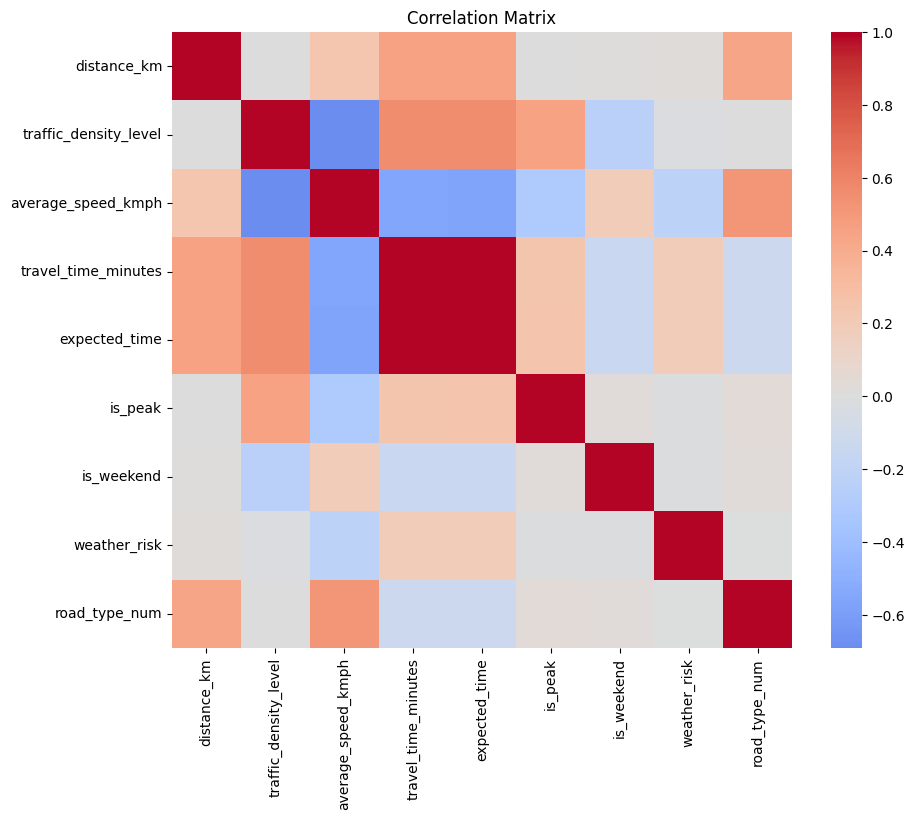

In [57]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

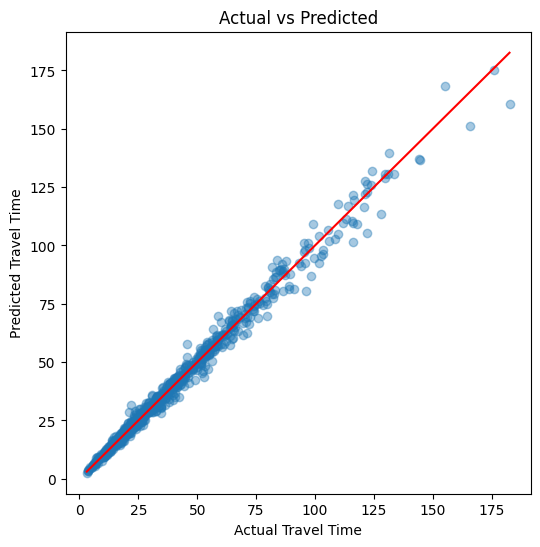

In [61]:
import matplotlib.pyplot as plt
y_pred = xgb_no.predict(X_test_no)

plt.figure(figsize=(6,6))
plt.scatter(y_test_no, y_pred, alpha=0.4)
plt.plot([y_test_no.min(), y_test_no.max()],
         [y_test_no.min(), y_test_no.max()],
         color='red')  # perfect prediction line
plt.xlabel("Actual Travel Time")
plt.ylabel("Predicted Travel Time")
plt.title("Actual vs Predicted")
plt.show()

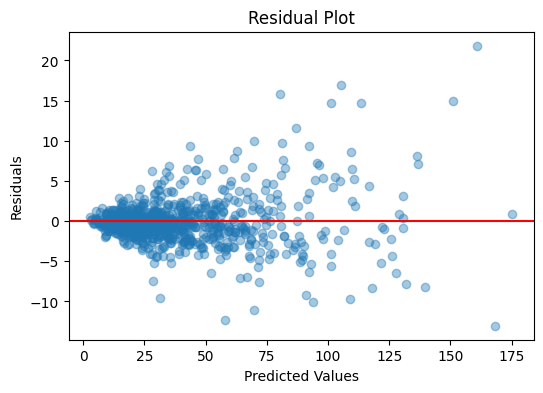

In [62]:
residuals = y_test_no - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.4)
plt.axhline(y=0, color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [63]:
df

,distance_km,traffic_density_level,average_speed_kmph,travel_time_minutes,expected_time,is_peak,is_weekend,weather_risk,road_type_num,start_area_Chandni Chowk,...,end_area_Noida Sector 18,end_area_Okhla,end_area_Pitampura,end_area_Preet Vihar,end_area_Punjabi Bagh,end_area_Rajouri Garden,end_area_Rohini,end_area_Saket,end_area_Shahdara,end_area_Vasant Kunj
0,9.44,1,37.8,15.3,14.984127,0,0,0,2,False,...,False,False,False,False,False,False,False,False,False,False
1,2.15,1,42.7,3.0,3.021077,0,1,0,2,False,...,False,False,False,False,False,False,False,False,False,False
2,14.54,3,9.7,92.7,89.938144,1,0,2,1,False,...,False,False,False,False,False,False,False,False,False,False
3,11.86,1,68.5,10.6,10.388321,0,0,0,3,False,...,False,False,False,False,False,False,False,False,False,False
4,20.26,2,30.3,42.0,40.118812,0,0,1,3,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,9.64,4,7.7,76.8,75.116883,1,0,0,1,False,...,False,False,False,False,False,False,False,False,False,False
3996,17.53,3,28.7,37.2,36.648084,1,1,0,2,False,...,False,False,False,False,False,False,False,False,False,False
3997,9.58,3,19.0,30.9,30.252632,1,1,0,2,False,...,False,False,False,False,False,False,False,False,False,False
3998,11.44,3,25.2,27.6,27.238095,1,1,1,2,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
df.to_csv('final_data.csv', index=False)